In [1]:
import pandas as pd
import numpy as np

## INTRO

### SERIES

In [2]:
s = pd.Series([-1,3,-5])
s

0   -1
1    3
2   -5
dtype: int64

In [3]:
s.index

RangeIndex(start=0, stop=3, step=1)

In [4]:
s.values

array([-1,  3, -5], dtype=int64)

In [8]:
s[0]

-1

In [9]:
s = pd.Series([2,4,5,-3], index=['a','b','c','d'])
s

a    2
b    4
c    5
d   -3
dtype: int64

In [15]:
s[1], s['a'], s[1:3], s[['a', 'd']]

(4,
 2,
 b    4
 c    5
 dtype: int64,
 a    2
 d   -3
 dtype: int64)

In [16]:
s['c'] = -1
s

a    2
b    4
c   -1
d   -3
dtype: int64

In [17]:
s[s > 0]

a    2
b    4
dtype: int64

In [20]:
s*3

a     6
b    12
c    -3
d    -9
dtype: int64

In [21]:
'e' in s, 'b' in s

(False, True)

In [23]:
data = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}

region = pd.Series(data)
region

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [24]:
region2 = pd.Series(data, index=['California', 'Ohio', 'Oregon', 'Texas'])
region2

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [25]:
pd.isnull(region2)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [26]:
pd.notnull(region2)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [27]:
region + region2

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [28]:
region2.name = 'pop'
region2.index.name  ='state'
region2

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: pop, dtype: float64

In [29]:
s

a    2
b    4
c   -1
d   -3
dtype: int64

In [30]:
s.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
s

Bob      2
Steve    4
Jeff    -1
Ryan    -3
dtype: int64

### DATAFRAME

a dict of equal-length lists or NumPy arrays

In [32]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
df = pd.DataFrame(data)
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [33]:
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [34]:
df2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                  index=['one', 'two', 'three', 'four', 'five', 'six'])
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [35]:
df2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [36]:
df2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [39]:
df2.iloc[1]

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object

In [41]:
df2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [43]:
df2['debt'] = 10
df2

,year,state,pop,debt
one,2000,Ohio,1.5,10
two,2001,Ohio,1.7,10
three,2002,Ohio,3.6,10
four,2001,Nevada,2.4,10
five,2002,Nevada,2.9,10
six,2003,Nevada,3.2,10


In [44]:
df2['debt'] = np.arange(6.)
df2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [45]:
val = pd.Series([-1, 4, 9], index=['two', 'four', 'five'])
df2['debt'] = val
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.0
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,4.0
five,2002,Nevada,2.9,9.0
six,2003,Nevada,3.2,NaN


In [46]:
df2['eastern'] = df2.state == 'Ohio'
df2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.0,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,4.0,False
five,2002,Nevada,2.9,9.0,False
six,2003,Nevada,3.2,NaN,False


In [47]:
del df2['eastern']
df2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

a nested dict of dicts:

In [48]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
        'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
df3 = pd.DataFrame(pop)
df3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [49]:
df3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [50]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [51]:
pdata = {'Ohio': df3['Ohio'][:-1],
        'Nevada': df3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [52]:
df3.index.name = 'year'
df3.columns.name = 'state'
df3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [53]:
df3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [54]:
df2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.0],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, 4.0],
       [2002, 'Nevada', 2.9, 9.0],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

## ESSENTIAL FUNCTIONALITY
### REINDEXING

In [55]:
a = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
a

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [56]:
b = a.reindex(['a', 'b', 'c', 'd', 'e'])
b

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [57]:
c = pd.Series(['blue', 'purple', 'yellow'], index=[0,2,4])
c

0      blue
2    purple
4    yellow
dtype: object

In [58]:
c.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [60]:
c.reindex(range(6), method='bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

In [61]:
df = pd.DataFrame(np.arange(9).reshape((3,3)),
                 index=['a', 'c', 'd'],
                 columns=['Ohio', 'Texas', 'California'])
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [62]:
df2 = df.reindex(['a', 'b', 'c', 'd'])
df2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [63]:
states = ['Texas', 'Utah', 'California']
df.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


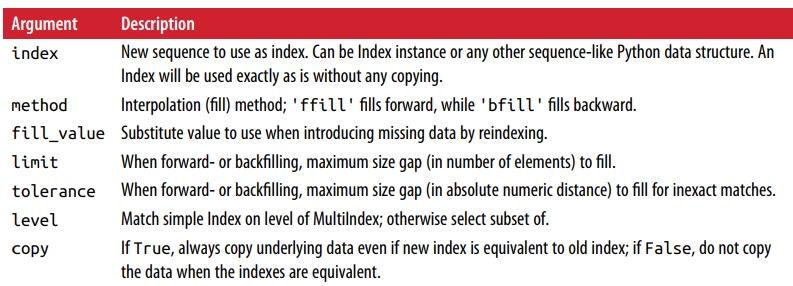

### DROPPING ENTRIES FROM AN AXIS

In [82]:
s = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
s

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [83]:
s1 = s.drop('c')
s1

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [84]:
s.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [85]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index=['Ohio', 'Colorado', 'Utah', 'NY'],
                   columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
NY,12,13,14,15


In [86]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
NY,12,14,15


In [87]:
? data.drop

In [88]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
NY,12,14


In [89]:
s.drop('c', inplace=True)
s

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [90]:
data.drop(columns=['two'])

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
NY,12,14,15


In [91]:
data.drop(['Ohio', 'Colorado'])

,one,two,three,four
Utah,8,9,10,11
NY,12,13,14,15


### INDEXING, SELECTION AND FILTERING

In [92]:
s = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
s

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [94]:
s['b'], s[1]

(1.0, 1.0)

In [96]:
s[2:4]

c    2.0
d    3.0
dtype: float64

In [98]:
s[['a', 'd', 'b']]

a    0.0
d    3.0
b    1.0
dtype: float64

In [100]:
s[[1,3]]

b    1.0
d    3.0
dtype: float64

In [101]:
s[s < 2]

a    0.0
b    1.0
dtype: float64

In [102]:
s['b':'c']

b    1.0
c    2.0
dtype: float64

In [103]:
s['b':'c'] = 5
s

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [104]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [105]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [106]:
data[['one', 'four']]

,one,four
Ohio,0,3
Colorado,4,7
Utah,8,11
New York,12,15


In [108]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [110]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [112]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


Selection with loc and iloc

In [113]:
data.loc['Colorado', ['two', 'three']]

two      5
three    6
Name: Colorado, dtype: int32

In [114]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int32

In [115]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [116]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [118]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


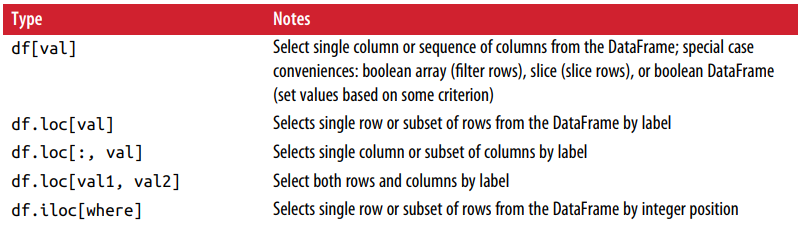
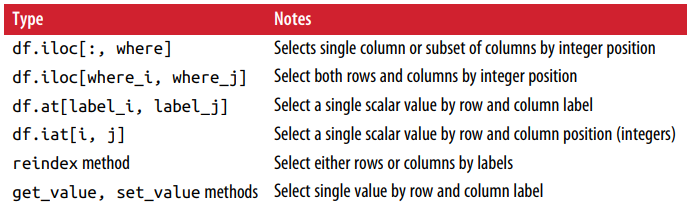

### INTEGER INDEXES

In [124]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [127]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c'])
ser2[-1]

2.0

In [128]:
ser[:1]

0    0.0
dtype: float64

In [129]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [130]:
ser.iloc[:1]

0    0.0
dtype: float64

### ARITHMETIC AND DATA ALIGNMENT

In [131]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
                index=['a', 'c', 'e', 'f', 'g'])
s1, s2

(a    7.3
 c   -2.5
 d    3.4
 e    1.5
 dtype: float64,
 a   -2.1
 c    3.6
 e   -1.5
 f    4.0
 g    3.1
 dtype: float64)

In [132]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [133]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                    index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1, df2

(            b    c    d
 Ohio      0.0  1.0  2.0
 Texas     3.0  4.0  5.0
 Colorado  6.0  7.0  8.0,
           b     d     e
 Utah    0.0   1.0   2.0
 Ohio    3.0   4.0   5.0
 Texas   6.0   7.0   8.0
 Oregon  9.0  10.0  11.0)

In [134]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [135]:
df1 = pd.DataFrame({'A': [1, 2]})
df2 = pd.DataFrame({'B': [3, 4]})
df1, df2

(   A
 0  1
 1  2,
    B
 0  3
 1  4)

In [136]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


Arithmetic methods with fill values

In [137]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                    columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                    columns=list('abcde'))
df2.loc[1, 'b'] = np.nan

df1, df2

(     a    b     c     d
 0  0.0  1.0   2.0   3.0
 1  4.0  5.0   6.0   7.0
 2  8.0  9.0  10.0  11.0,
       a     b     c     d     e
 0   0.0   1.0   2.0   3.0   4.0
 1   5.0   NaN   7.0   8.0   9.0
 2  10.0  11.0  12.0  13.0  14.0
 3  15.0  16.0  17.0  18.0  19.0)

In [138]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [139]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [140]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [141]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [142]:
df1.reindex(columns=df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


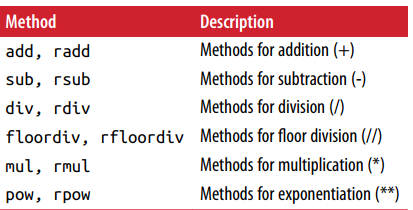

Operations bw DF and Series

In [143]:
arr = np.arange(12.).reshape((3,4))
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [144]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [145]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                    columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]
frame, series

(          b     d     e
 Utah    0.0   1.0   2.0
 Ohio    3.0   4.0   5.0
 Texas   6.0   7.0   8.0
 Oregon  9.0  10.0  11.0,
 b    0.0
 d    1.0
 e    2.0
 Name: Utah, dtype: float64)

In [146]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [147]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [148]:
series3 = frame['d']
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### FUNCTION APPLICATION AND MAPPING

In [150]:
df = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                    index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df

,b,d,e
Utah,-0.995837,0.438664,-1.237762
Ohio,-0.770656,0.879810,1.708621
Texas,0.100472,-1.043284,0.949020
Oregon,0.124338,-0.029513,-0.070989


In [151]:
np.abs(df)

,b,d,e
Utah,0.995837,0.438664,1.237762
Ohio,0.770656,0.879810,1.708621
Texas,0.100472,1.043284,0.949020
Oregon,0.124338,0.029513,0.070989


In [152]:
f = lambda x: x.max() - x.min()
df.apply(f)

b    1.120175
d    1.923094
e    2.946383
dtype: float64

In [153]:
df.apply(f, axis='columns')

Utah      1.676426
Ohio      2.479276
Texas     1.992304
Oregon    0.195327
dtype: float64

### SORTING AND RANKING

SORT_INDEX
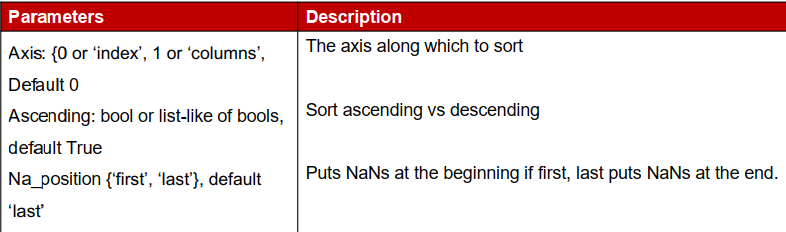

In [154]:
s = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
s.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [155]:
df = pd.DataFrame(np.arange(8).reshape((2, 4)),
                    index=['three', 'one'],
                    columns=['d', 'a', 'b', 'c'])
df

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [156]:
df.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [157]:
df.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [158]:
df.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


SORT_VALUES
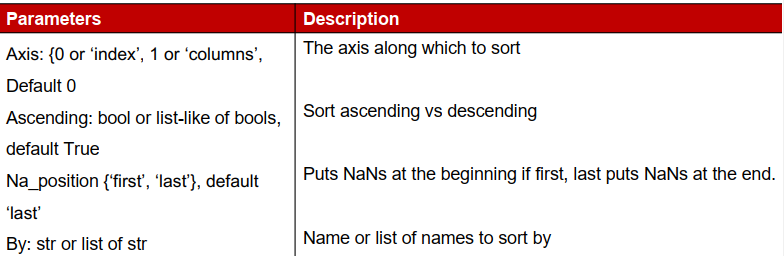

In [160]:
s1 = pd.Series([4,7,-1,5])
s1.sort_values()

2   -1
0    4
3    5
1    7
dtype: int64

In [161]:
s1 = pd.Series([4,np.nan,-1,5])
s1.sort_values()

2   -1.0
0    4.0
3    5.0
1    NaN
dtype: float64

In [162]:
df = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
df

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [163]:
df.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [165]:
df.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


RANK
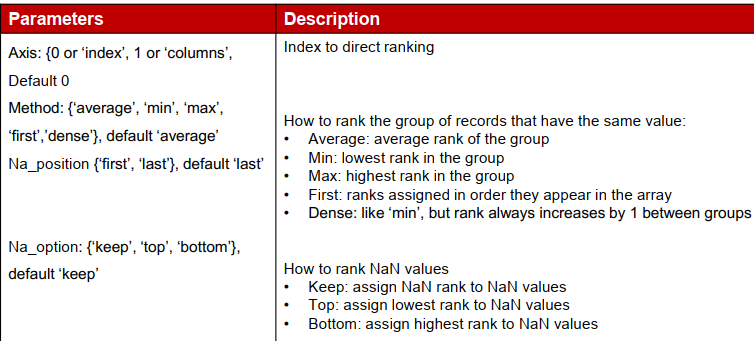

In [171]:
obj = pd.Series([7,-5,7,4,2,0,4])
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [172]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [173]:
# assign tie values the max rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [174]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                        'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [176]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### AXIS INDEXES WITH DUPLICATE LABELS

In [177]:
s = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
s

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [179]:
s.index.is_unique

False

In [180]:
s['a']

a    0
a    1
dtype: int64

In [181]:
df = pd.DataFrame(np.random.randn(4,3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,0.401503,0.828009,-0.950539
a,1.412632,-0.200623,-0.387915
b,-0.069756,-0.306279,0.288672
b,-1.002662,-0.093773,-0.186055


In [182]:
df.loc['b']

,0,1,2
b,-0.069756,-0.306279,0.288672
b,-1.002662,-0.093773,-0.186055


## SUMMARIZING AND COMPUTING DESCRIPTIVE STATISTICS

In [183]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                    [np.nan, np.nan], [0.75, -1.3]],
                index=['a', 'b', 'c', 'd'],
                columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [184]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [185]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [186]:
? df.mean

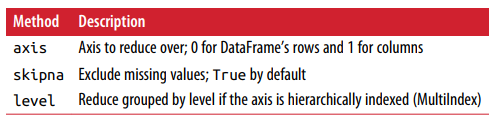
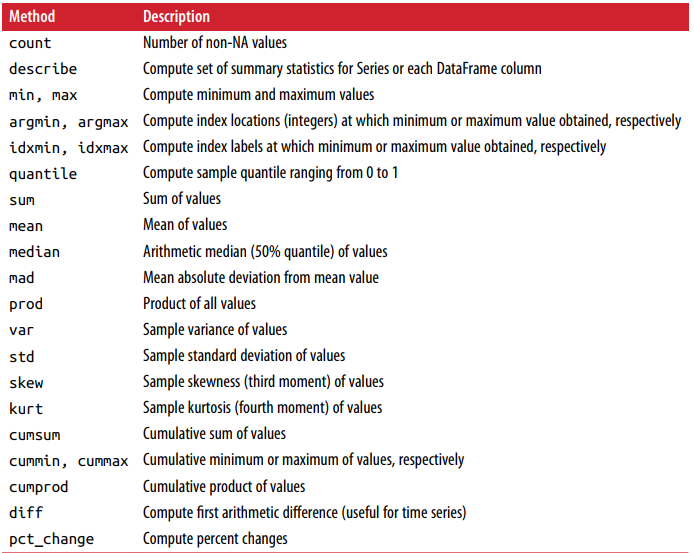

In [187]:
df.idxmax()

one    b
two    d
dtype: object

In [188]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [189]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [190]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### unique values, value counts, membership

In [195]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
uni = obj.unique()
uni

array(['c', 'a', 'd', 'b'], dtype=object)

In [196]:
obj.value_counts()

a    3
c    3
b    2
d    1
dtype: int64

In [197]:
pd.value_counts(obj.values, sort=False)

a    3
c    3
d    1
b    2
dtype: int64

In [199]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [198]:
 obj[obj.isin(['b', 'c'])]

0    c
5    b
6    b
7    c
8    c
dtype: object

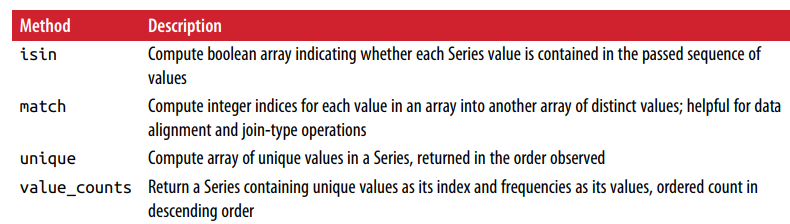

In [201]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                    'Qu2': [2, 3, 1, 2, 3],
                    'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [204]:
data.apply(pd.value_counts).fillna(0)

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0
